# House Price Prediction Model

## Problem Statemtent

By analyzing house data we will determine the approximate price for the houses

## Load Modules

In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas. api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
import calendar
import sklearn.linear_model as linear_model
import pickle

## Reading the Data from the CSV file

In [124]:
trainPath = r"D:\Galaxy\Bharat_intern\HousePricePrediction\train.csv"
testPath = r"D:\Galaxy\Bharat_intern\HousePricePrediction\test.csv"
dfTrain = pd.read_csv(trainPath)
dfTest = pd.read_csv(testPath)
print("Shape of Train ",dfTrain.shape)
print("Shape of Test ",dfTest.shape)

Shape of Train  (1460, 81)
Shape of Test  (1459, 80)


In [125]:
pd.set_option("display.max_columns",None)

In [126]:
 dfTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
dfTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Description

## Data Integration

In [128]:
 df = pd.concat([dfTrain,dfTest])
    
print("Shape of integrated data :",df.shape)

Shape of integrated data : (2919, 81)


In [129]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [130]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Exploratory Data Analysis

In [131]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [132]:
# Checking if there is some null values or not
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,False,Fal

In [133]:
int_ft = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features",int_ft.shape[0])
print("Interger feature names :",int_ft.tolist())

Total number of integer features 26
Interger feature names : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [134]:
float_ft = df.select_dtypes(include=["float64"]).columns
print("Total number of floating features :",float_ft.shape[0])
print("floating  feature names :",float_ft.tolist())

Total number of floating features : 12
floating  feature names : ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [135]:
cat_ft = df.select_dtypes(include=["object"]).columns
print("Total number of categorical features : ",cat_ft.shape[0])
print("Interger feature names :",cat_ft.tolist())

Total number of categorical features :  43
Interger feature names : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Obtain statistical data for numerical attributes

In [136]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Visualise null/missing value

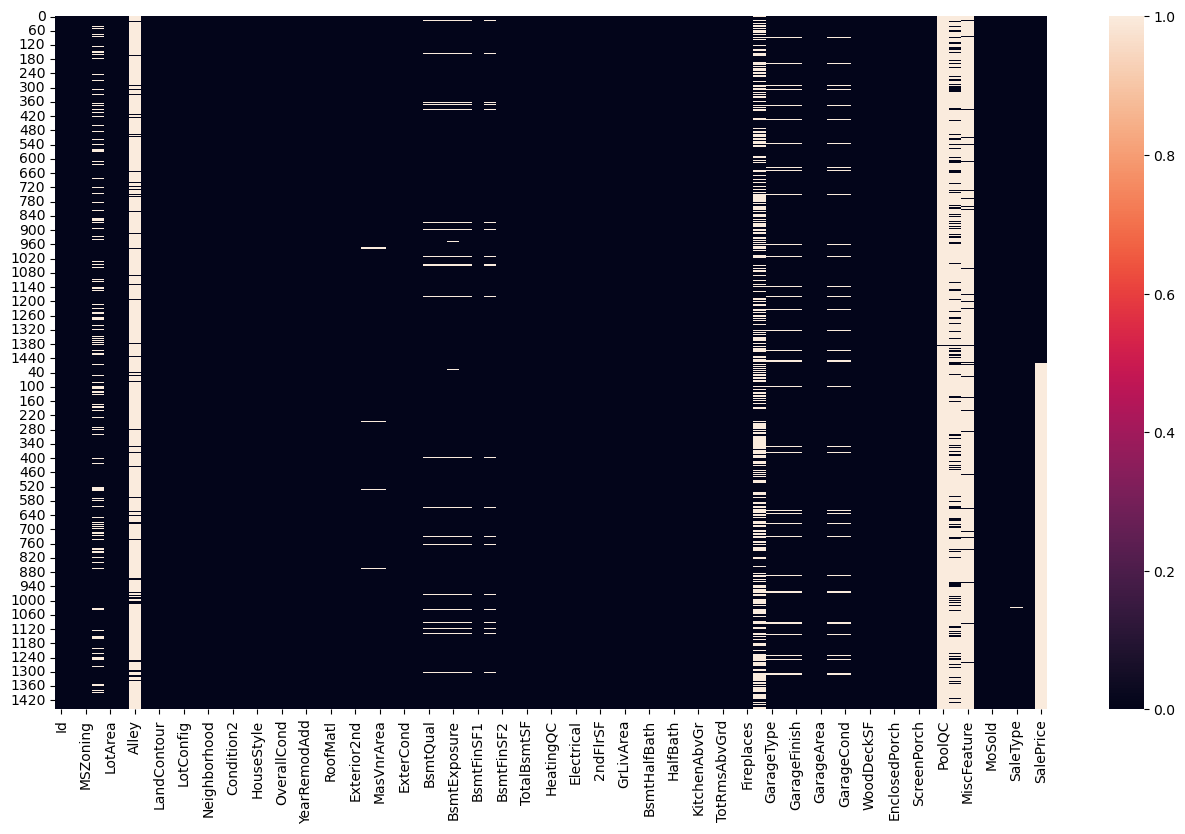

In [137]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_value.png")

## Get the null value percentage for every feature

In [138]:
null_percent= df.isnull().sum()/df.shape[0]*100
null_percent


Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

## Whether to retain or remove features.
Based on our observations, we have decided not to eliminate any features from the dataset.

In [139]:
""" Based on domain knowledge, we will retain these features and replace any missing
values with a constant value of 'NA' instead of dropping them."""
mis_value=null_percent[null_percent>50]
mis_value

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [140]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [141]:
""" Based on domain knowledge, we will retain FireplaceQu features and replace any missing
values with a constant value of 'NA' instead of dropping it."""
mis_value=null_percent[(null_percent>20)&(null_percent<51)]
mis_value

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [142]:
mis_value=null_percent[(null_percent>5)&(null_percent<21)]
mis_value

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [143]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: >

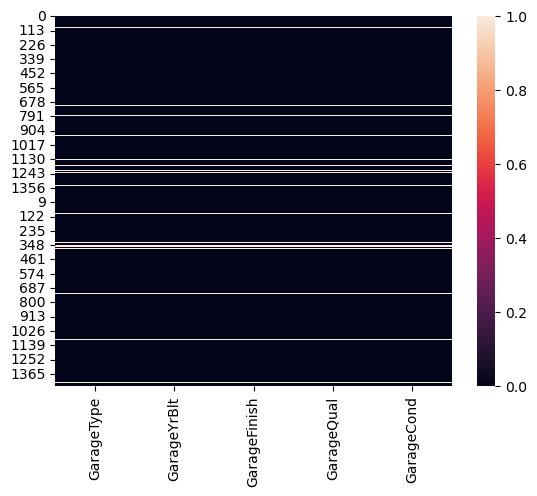

In [144]:
mis_value=null_percent[(null_percent>5)&(null_percent<10)]
sns.heatmap(df[mis_value.keys()].isnull())

## Missing Value Imputation

In [145]:
miss_val_feat = null_percent[null_percent >0]
print("Total missing Value Feature :",len(miss_val_feat))
miss_val_feat

Total missing Value Feature : 35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [146]:
cat_feat=miss_val_feat[miss_val_feat.keys().isin(cat_ft)]
print("Total numbes of categorical missing  Feature :",len(cat_feat))
cat_feat

Total numbes of categorical missing  Feature : 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [147]:
int_feat=miss_val_feat[miss_val_feat.keys().isin(int_ft)]
print("Total numbes of integer missing  Feature :",len(int_feat))
int_feat

Total numbes of integer missing  Feature : 0


Series([], dtype: float64)

In [148]:
float_feat=miss_val_feat[miss_val_feat.keys().isin(float_ft)]
print("Total numbes of floating missing  Feature :",len(float_feat))
float_feat

Total numbes of floating missing  Feature : 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### handling MSZoning = 0.137033

In [149]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

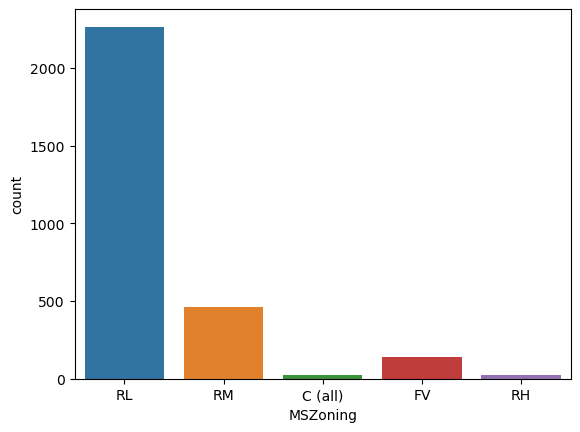

In [150]:
sns.countplot(x="MSZoning",data=df) 


In [151]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [152]:
### backup data
df_new=df.copy()
df_new.shape

(2919, 81)

In [153]:
mszoning_mode=df["MSZoning"].mode()[0]
df_new["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
df_new["MSZoning"].isnull().sum()

0

In [154]:
def oldNewCountplot(df, df_new,feature):
  plt.subplot(121)
  sns.countplot(x=feature,data=df)
  plt.title("Old Data Distribution")
  plt.subplot(122)
  sns.countplot(x=feature,data=df_new)
  plt.title("New Data Distribution")

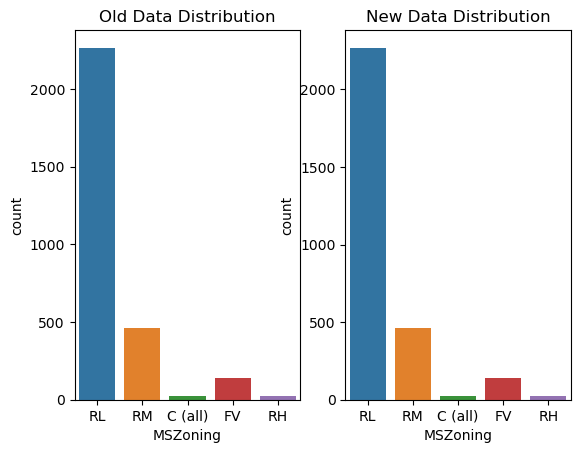

In [155]:
oldNewCountplot(df, df_new,"MSZoning")

### Handling Alley = 93.219855

In [156]:
df_new["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [157]:
alley_cont = "NA"       
df_new["Alley"].replace(np.nan, alley_cont, inplace=True)
df_new["Alley"].isnull().sum()

0

In [158]:
def oldNewCountplot(df, df_new,feature):
  plt.subplot(121)
  sns.countplot(x=feature,data=df)
  plt.title("Old Data Distribution")
  plt.subplot(122)
  sns.countplot(x=feature,data=df_new)
  plt.title("New Data Distribution")

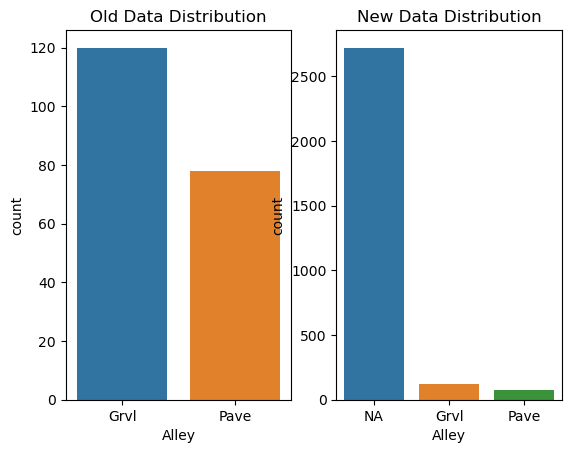

In [159]:
oldNewCountplot(df, df_new,"Alley")

### Handling Numerical Feature LotFrontage = 16.649538

In [160]:
def boxHistPlot(feature, figsize = (16,5)):
  plt.figure(figsize=figsize)
  plt.subplot(121)       
  sns.boxplot(x=feature,data=df)
  plt.subplot(122)
  sns.distplot(df[feature])

C:\Users\my\AppData\Local\Temp\ipykernel_13600\235591384.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


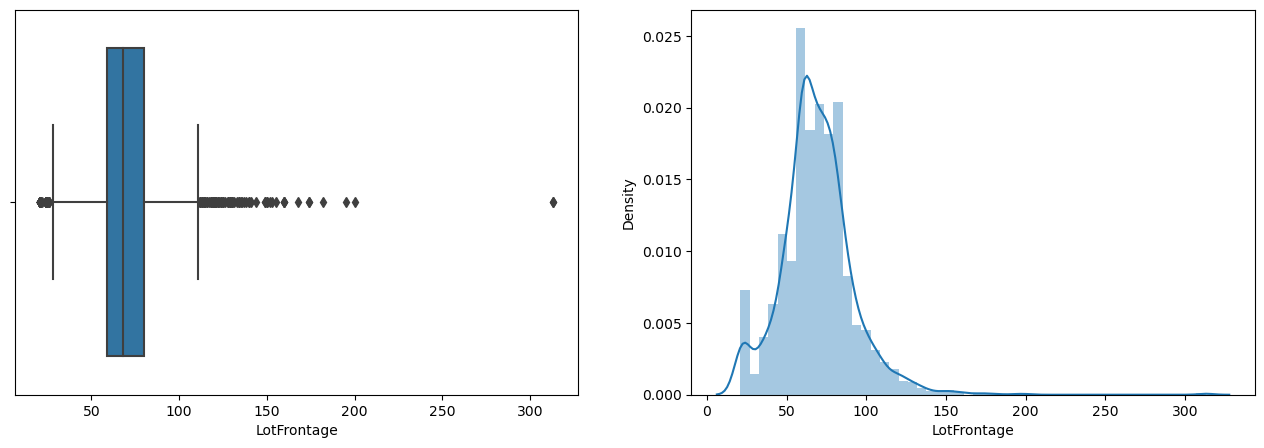

In [161]:
boxHistPlot("LotFrontage")

In [162]:
lotfrontage_mean = df["LotFrontage"].mean()
lotfrontage_mean

69.30579531442663

In [163]:
df_new["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace= True)
df_new["LotFrontage"].isnull().sum()

0

In [164]:
def oldNewBoxHistplot(ds, new,feature, figsize = (16,10)):   # def=defination
  plt.figure(figsize=figsize)
  plt.subplot(221)
  sns.boxplot(x=feature,data=ds)
  plt.title("Old Data Distribution")
  plt.subplot(222)
  sns.distplot(ds[feature])
  plt.title("Old Data Distribution")
  plt.subplot(223)
  sns.boxplot(x=feature,data=new)
  plt.title("New Data Distribution")
  plt.subplot(224)
  sns.distplot(new[feature])
  plt.title("New Data Distribution")

C:\Users\my\AppData\Local\Temp\ipykernel_13600\3438144487.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds[feature])
C:\Users\my\AppData\Local\Temp\ipykernel_13600\3438144487.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new[feature])


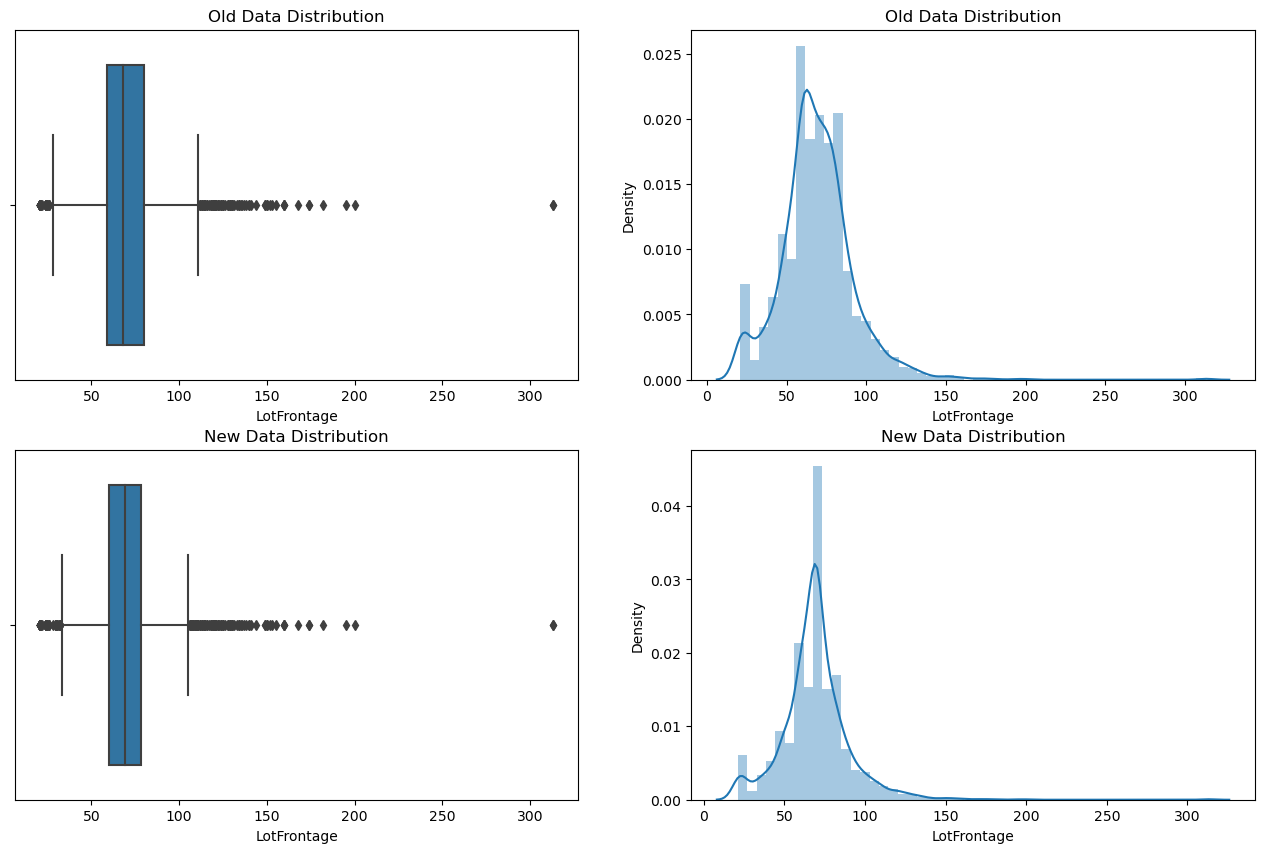

In [165]:
oldNewBoxHistplot(df, df_new,"LotFrontage")

### Handling Utilities = 0.068517

In [166]:
df["Utilities"].value_counts() 

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [167]:
utilities_mode = df["Utilities"].mode()[0] 
utilities_mode

'AllPub'

In [168]:
df_new["Utilities"].replace(np.nan, utilities_mode, inplace=True)
df_new["Utilities"].isnull().sum()

0

### Handling Exterior1st = 0.034258 Handling Exterior2nd = 0.034258

In [169]:
df["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [170]:
df["Exterior2nd"].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [171]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior1st_mode

'VinylSd'

In [172]:
exterior2nd_mode = df["Exterior2nd"].mode()[0]
exterior2nd_mode

'VinylSd'

In [173]:
df_new["Exterior1st"].replace(np.nan, exterior1st_mode, inplace=True)
df_new["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace=True)
print("E1st is null: ", df_new["Exterior1st"].isnull().sum())
print("E2nd is null: ", df_new["Exterior2nd"].isnull().sum())

E1st is null:  0
E2nd is null:  0


### Handling categorical feature MasVnrType = 0.822199

### Handling Numerical Feature MasVnrArea = 0.787941

<Axes: >

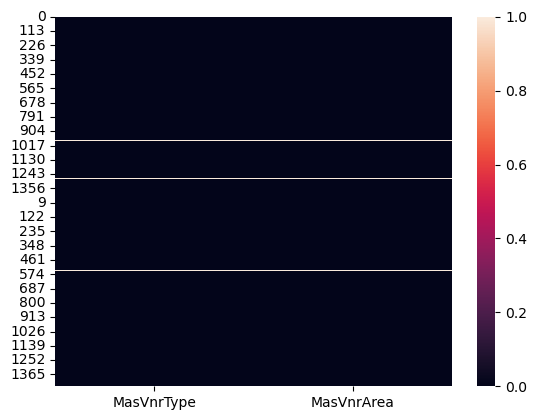

In [174]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [175]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0


In [176]:
df["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [177]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
masvnrtype_mode

'None'

In [178]:
df_new["MasVnrType"].replace(np.nan, utilities_mode, inplace=True)
df_new["MasVnrType"].isnull().sum()

0

C:\Users\my\AppData\Local\Temp\ipykernel_13600\235591384.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


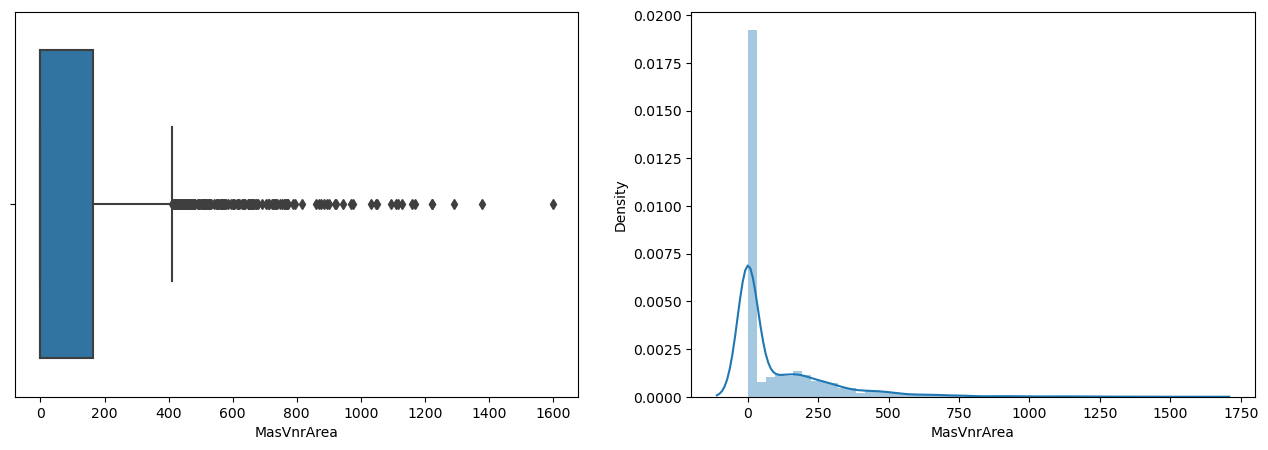

In [179]:
boxHistPlot("MasVnrArea")

In [180]:
masvnrarea_cont = 0     

df_new["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)
df_new["MasVnrArea"].isnull().sum()

0

### Handling Bsmt Features

In [181]:
cat_bsmt_feat =["BsmtQual",
"BsmtQual",      
"BsmtCond",       
"BsmtExposure",     
"BsmtFinType1",   
"BsmtFinType2"]   

num_bsmt_feat = ["BsmtFinSF1",
"BsmtFinSF1",
"BsmtFinSF2" ,    
"BsmtUnfSF"   ,   
"TotalBsmtSF"  ,    
"BsmtFullBath"  ,   
"BsmtHalfBath"]

<Axes: >

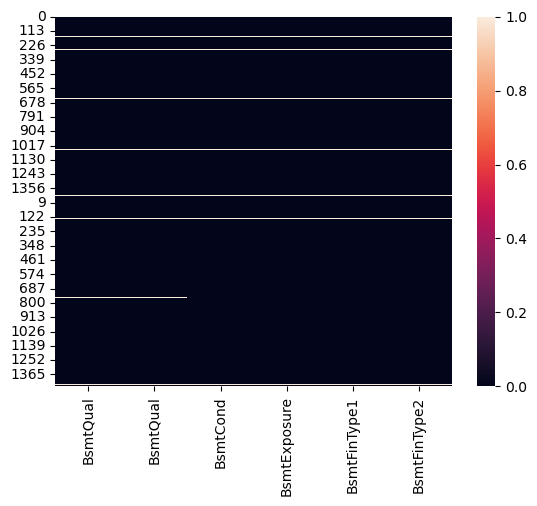

In [182]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [183]:
for feat in cat_bsmt_feat:              # for loop
  print(f"Value count of (feat): {df[feat].value_counts()}")

Value count of (feat): TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of (feat): TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of (feat): TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of (feat): No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of (feat): Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of (feat): Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [184]:
bsmt_cont = "NA"   
for feat in cat_bsmt_feat:
  df_new[feat].replace(np.nan, bsmt_cont, inplace = True)
df_new[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: >

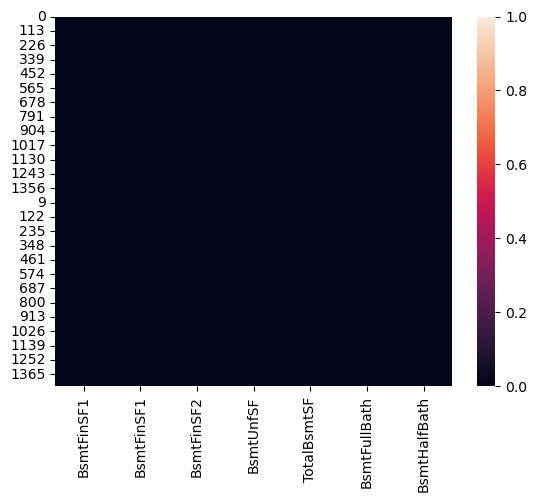

In [185]:
sns.heatmap(df[num_bsmt_feat].isnull()) 

In [186]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)].head()

,BsmtQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
bsmt_num = 0
for feat in num_bsmt_feat:
  df_new[feat].replace(np.nan, bsmt_num, inplace = True)
df_new[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### Handling electrical = 0.034258 kitchenQual = 0.034258

In [188]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [189]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [190]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
1379,NaN,Gd,1
95,SBrkr,NaN,1


In [191]:
electrical_mode = df["Electrical"].mode()[0]
df_new["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_new["Electrical"].isnull().sum()

0

In [192]:
KitchenQual_mode = df["Electrical"].mode()[0]
df_new["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)
df_new["KitchenQual"].isnull().sum()

0

### Handling Remaining Cat Feature

In [193]:
df["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [194]:
df["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [195]:
Functional_mode = df["Functional"].mode()[0]
df_new["Functional"].replace(np.nan, electrical_mode, inplace=True)
df_new["Functional"].isnull().sum()

0

In [196]:
SaleType = df["SaleType"].mode()[0]
df_new["SaleType"].replace(np.nan, electrical_mode, inplace=True)
df_new["SaleType"].isnull().sum()

0

In [197]:
other_cat_feat = ["FireplaceQu", "PoolQC","Fence","MiscFeature"]
for ct_ft in other_cat_feat:
  print(f"Value count of (ct_ft): {df[ct_ft].value_counts()}")

Value count of (ct_ft): Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Value count of (ct_ft): Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Value count of (ct_ft): MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Value count of (ct_ft): Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [198]:
fireplaceQu_cont = "NA"
df_new["FireplaceQu"].replace(np.nan, fireplaceQu_cont, inplace=True)
df_new["FireplaceQu"].isnull().sum()

0

In [199]:
poolqc_cont = "NA"
df_new["PoolQC"].replace(np.nan, poolqc_cont, inplace=True)
df_new["PoolQC"].isnull().sum()

0

In [200]:
fence_cont = "NA"
df_new["Fence"].replace(np.nan,fence_cont , inplace=True)
df_new["Fence"].isnull().sum()

0

In [201]:
miscfeature_count = "NA"
df_new["MiscFeature"].replace(np.nan,miscfeature_count , inplace=True)
df_new["MiscFeature"].isnull().sum()

0

### Handling Garage Feature

In [202]:
cat_garage_feat = ["GarageType","GarageFinish","GarageQual","GarageCond"]
num_garage_feat = ["GarageYrBlt","GarageCars","GarageArea"]

df_garafe = df[num_garage_feat + cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)].head()

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,0.0,0.0,NaN,NaN,NaN,NaN
48,NaN,0.0,0.0,NaN,NaN,NaN,NaN
78,NaN,0.0,0.0,NaN,NaN,NaN,NaN
88,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [204]:
garage_cont = "NA"
for feat in cat_garage_feat:
  df_new[feat].replace(np.nan, garage_cont, inplace=True)
df_new[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [205]:
garage_num = 0
for feat in num_garage_feat:
  df_new[feat].replace(np.nan, garage_num, inplace=True)
df_new[num_garage_feat].isnull().sum()


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [206]:
df_new.isnull().any(axis=1).sum()


1459

## Feature Transformation

### Convert Numerical Feature To categorical Feature

In [207]:
for_num_conv = ["MSSubClass", "YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]    # Depend domain knowleged and data year cha data categorical compulsory
for feat in for_num_conv:
  print(f"{feat}: data type = {df_new[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [208]:
df_new[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,2003,2003,2003.0,2,2008
1,20,1976,1976,1976.0,5,2007
2,60,2001,2002,2001.0,9,2008
3,70,1915,1970,1998.0,2,2006
4,60,2000,2000,2000.0,12,2008


In [209]:
df_new["MoSold"].unique()


array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [210]:
calendar.month_abbr[12]  

'Dec'

In [211]:
df_new["MoSold"] = df_new["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_new["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [212]:
for feat in for_num_conv:
  df_new[feat]  = df_new[feat].astype(str)

In [213]:
for feat in for_num_conv:
  print(f"{feat}: data type = {df_new[feat].dtype}")


MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


### Convert Categorical Feature Into Numerical Feature

Ordinal encoding

In [214]:
ordinal_end_var = ["ExterQual",
                   "ExterCond",
                   "BsmtQual",
                   "BsmtCond",
                   "BsmtExposure",
                   "BsmtFinType1",
                   "BsmtFinSF1",
                   "BsmtFinType2",
                   "HeatingQC",
                   "KitchenQual",
                   "fIreplaceQu",
                   "GarageQual",
                   "GarageCond",
                   "PoolQC",
                   "Functional",
                   "GarageFinish",
                   "PavedDrive",
                   "Utilities"]
print("Total Number Of Features To Convert Ordinal Numerical Format:", len(ordinal_end_var))

Total Number Of Features To Convert Ordinal Numerical Format: 18


In [215]:
df_new["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [216]:
df_new["ExterQual"] = df_new["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"], ordered=True)).cat.codes

In [217]:
df_new["ExterQual"].value_counts()

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [218]:
df_new["BsmtExposure"].value_counts()

No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [219]:
df_new["BsmtExposure"] = df_new["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"], ordered=True)).cat.codes

In [220]:
df_new["BsmtExposure"].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [221]:
df_new['ExterCond'] = df_new['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','EX'], ordered = True)).cat.codes
df_new['BsmtQual'] = df_new['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes
df_new['BsmtCond'] = df_new['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes
df_new['BsmtFinType1'] = df_new['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)).cat.codes
df_new['BsmtFinType2'] = df_new['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)).cat.codes
df_new['HeatingQC'] = df_new['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','EX'], ordered = True)).cat.codes
df_new['KitchenQual'] = df_new['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','EX'], ordered = True)).cat.codes
df_new['FireplaceQu'] = df_new['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes
df_new['GarageQual'] =df_new['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes
df_new['GarageCond'] = df_new['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered = True)).cat.codes
df_new['PoolQC'] = df_new['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa','TA','Gd','EX'], ordered = True)).cat.codes
df_new['Functional'] = df_new['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], ordered = True)).cat.codes
df_new['GarageFinish'] = df_new['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin','Gd','Ex'], ordered = True)).cat.codes
df_new['PavedDrive'] =df_new['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'], ordered = True)).cat.codes
df_new['Utilities'] = df_new['Utilities'].astype(CategoricalDtype(categories=['ELO','NASeWa','NASeWr','ALLPub'], ordered = True)).cat.codes

In [222]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   int8   
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## One Hot Encoding for Nominal Categorical Data

In [223]:
df_encod = df_new.copy()    # comvert iN binary number
object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type feature : ", len(object_features))

print("Features", object_features)

Total object data type feature :  32
Features ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [224]:
df_encod[object_features].head(5)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2001.0,NA,NA,Sep,2008,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,1998.0,NA,NA,Feb,2006,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2000.0,NA,NA,Dec,2008,WD,Normal


In [225]:
df_encod["MSZoning"].value_counts() 

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [226]:
# Convert categorical to numerical 
pd.get_dummies(df_encod["MSZoning"], columns="MSZoning", prefix="MSZoning", drop_first=True).head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [227]:
print("Shape of DF before ecoding : ", df_encod.shape)
df_encod = pd.get_dummies(df_encod,
                          columns=object_features,
                          prefix=object_features,
                          drop_first=True)
print("Shape of DF after ecoding : ", df_encod.shape)

Shape of DF before ecoding :  (2919, 81)
Shape of DF after ecoding :  (2919, 516)


In [228]:
df_encod.shape

(2919, 516)

In [229]:
df_encod.head()

,Id,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd

In [230]:
df_encod.select_dtypes(include="object").columns.tolist()


[]

## Split Data For Training and Testing

In [231]:
X = df_encod.drop(['SalePrice'], axis=1)
y = df_encod['SalePrice']
df_encod.shape

(2919, 516)

In [232]:
len_train = dfTrain.shape[0]
len_train

1460

In [233]:
X_train = df_encod[:len_train].drop("SalePrice", axis = 1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice", axis = 1)


print("Shape of X_train data :", X_train.shape)
print("Shape of y_train data :", y_train.shape)
print("Shape of X_test data :", X_test.shape)

Shape of X_train data : (1460, 515)
Shape of y_train data : (1460,)
Shape of X_test data : (1459, 515)


## Feature Scalling

In [234]:
sc = StandardScaler()
sc.fit(X_train)
# z = (x-u)/s

StandardScaler()

In [235]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train[:3,:]


array([[-1.73086488, -0.22335706, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 ,  0.45789401, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953, -0.08710685,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [236]:
X_test[:3,:]

array([[ 1.73323755,  0.45789401,  0.11076257, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73561022,  0.50331075,  0.37584985, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7379829 ,  0.18539358,  0.33205282, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [237]:
sc.mean_

array([ 7.30500000e+02,  6.99179459e+01,  1.05168281e+04, -1.00000000e+00,
        6.09931507e+00,  5.57534247e+00,  1.03117123e+02,  2.39589041e+00,
        2.07328767e+00,  3.48904110e+00,  2.93493151e+00,  1.63013699e+00,
        3.54589041e+00,  4.43639726e+02,  1.24726027e+00,  4.65493151e+01,
        5.67240411e+02,  1.05742945e+03,  6.07534247e-01,  1.16262671e+03,
        3.46992466e+02,  5.84452055e+00,  1.51546370e+03,  4.25342466e-01,
        5.75342466e-02,  1.56506849e+00,  3.82876712e-01,  2.86643836e+00,
        1.04657534e+00,  2.16917808e+00,  6.51780822e+00,  6.84178082e+00,
        6.13013699e-01,  1.82534247e+00,  1.71575342e+00,  1.76712329e+00,
        4.72980137e+02,  2.81027397e+00,  2.80890411e+00,  1.85616438e+00,
        9.42445205e+01,  4.66602740e+01,  2.19541096e+01,  3.40958904e+00,
        1.50609589e+01,  2.75890411e+00,  6.16438356e-03,  4.34890411e+01,
        0.00000000e+00,  4.31506849e-02,  6.84931507e-03,  2.05479452e-02,
        3.67123288e-01,  

In [238]:
sc.n_features_in_

515

In [239]:
sc.n_samples_seen_

1460

In [240]:
sc.scale_

array([4.21465598e+02, 2.20183141e+01, 9.97784611e+03, 1.00000000e+00,
       1.38252284e+00, 1.11241818e+00, 1.80669468e+02, 5.74083750e-01,
       3.67477722e-01, 8.76178133e-01, 5.51969384e-01, 1.06702569e+00,
       2.10705360e+00, 4.55941866e+02, 8.92026722e-01, 1.61264017e+02,
       4.41715605e+02, 4.38555057e+02, 1.68232494e+00, 3.86455322e+02,
       4.36378914e+02, 4.86064268e+01, 5.25300394e+02, 5.18732867e-01,
       2.38670868e-01, 5.50727099e-01, 5.02713131e-01, 8.15498620e-01,
       2.20262727e-01, 1.00791831e+00, 1.62483655e+00, 6.67468828e-01,
       6.44445572e-01, 1.81025661e+00, 8.92525151e-01, 7.47059036e-01,
       2.13731608e+02, 7.22650132e-01, 7.19438635e-01, 4.96421800e-01,
       1.25295863e+02, 6.62333334e+01, 6.10982138e+01, 2.93072887e+01,
       5.57383170e+01, 4.01635452e+01, 1.45584605e-01, 4.95953090e+02,
       1.00000000e+00, 2.03196219e-01, 8.24766752e-02, 1.41865172e-01,
       4.82020518e-01, 2.12195053e-01, 5.22706412e-02, 9.02863400e-02,
      

In [241]:
sc.var_

array([1.77633250e+05, 4.84806156e+02, 9.95574129e+07, 0.00000000e+00,
       1.91136939e+00, 1.23747420e+00, 3.26414568e+04, 3.29572152e-01,
       1.35039876e-01, 7.67688122e-01, 3.04670201e-01, 1.13854382e+00,
       4.43967489e+00, 2.07882985e+05, 7.95711672e-01, 2.60060832e+04,
       1.95112676e+05, 1.92330538e+05, 2.83021721e+00, 1.49347716e+05,
       1.90426557e+05, 2.36258473e+03, 2.75940503e+05, 2.69083787e-01,
       5.69637831e-02, 3.03300338e-01, 2.52720492e-01, 6.65038000e-01,
       4.85156690e-02, 1.01589932e+00, 2.64009383e+00, 4.45514637e-01,
       4.15310096e-01, 3.27702899e+00, 7.96601145e-01, 5.58097204e-01,
       4.56812003e+04, 5.22223213e-01, 5.17591950e-01, 2.46434603e-01,
       1.56990532e+04, 4.38685445e+03, 3.73299173e+03, 8.58917168e+02,
       3.10675998e+03, 1.61311037e+03, 2.11948771e-02, 2.45969468e+05,
       0.00000000e+00, 4.12887033e-02, 6.80240195e-03, 2.01257272e-02,
       2.32343779e-01, 4.50267405e-02, 2.73221993e-03, 8.15162319e-03,
      

In [242]:
sc.with_mean

True

In [243]:
sc.with_std

True

## Cross Validation

In [304]:
from sklearn.model_selection import KFold, cross_val_score   # cross validation
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
  cv = KFold(n_splits =7, shuffle=True, random_state = 45)
  r2 = make_scorer(r2_score)
  r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
  score = [r2_val_score.mean()]
  return score

##  Train ML Model

In [305]:
LR = linear_model.LinearRegression()
test_model(LR)

[-4.3024185861656536e+24]

In [306]:
rdg = linear_model.Ridge()
test_model(rdg)

[0.7154682998617521]

In [307]:
lso = linear_model.Lasso(alpha=1e-4)
test_model(lso)

D:\Users\my\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.304e+11, tolerance: 7.804e+08
  model = cd_fast.enet_coordinate_descent(
D:\Users\my\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.020e+11, tolerance: 7.971e+08
  model = cd_fast.enet_coordinate_descent(
D:\Users\my\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.925e+11, tolerance: 8.222e

[0.5776731200977221]

In [309]:
X_test.shape

(1459, 515)

In [310]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [311]:
LR.fit(X_train,y_train)

LinearRegression()

## Model Save

In [316]:
filename = 'LinearRegressionl_house_price_prediction_mode.csv'
pickle.dump(reg,open(filename,'wb'))
model_house_price_prediction = pickle.load(open('LinearRegressionl_house_price_prediction_mode.csv', 'rb'))
model_house_price_prediction.predict(X_test)

array([130218.  , 157850.56, 179148.  , ..., 154395.24, 108525.  ,
       223416.96])

In [317]:
y_pred=reg.predict(X_test)

In [318]:
y_pred

array([130218.  , 157850.56, 179148.  , ..., 154395.24, 108525.  ,
       223416.96])

In [319]:
save_prediction = pd.concat([dfTest['Id'],pd.DataFrame(y_pred)], axis=1)
save_prediction.columns=['Id', 'SalePrice']
save_prediction.to_csv('LinearRegression_SalePrice_.csv', index=False)
save_prediction

,Id,SalePrice
0,1461,130218.00
1,1462,157850.56
2,1463,179148.00
3,1464,177741.61
4,1465,201180.47
...,...,...
1454,2915,84202.00
1455,2916,86081.00
1456,2917,154395.24
1457,2918,108525.00
